In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense

In [2]:
#Importing the training set
dataset_train= pd.read_csv(r"C:\Users\DELL\Desktop\bharath\DS\csv\Google_Stock_Price_Train.csv")
training_set = dataset_train.iloc[:,1:2].values

In [3]:
#Feature Scaling ( Standardisation vs Normalisation) normalisation for sigmoid
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

"""

Timesteps = 60

60 time steps means that at each time 't' the RNN is going to look at the 60 stock prices.
Before time 't' that is the stock price is between 60 days before time 't' .
And based on the trends it is capturing during the 60 time steps will try to predict the next
output. So 60 time steps are the past information from which our RNN is going to try to learn and understand
some correlations or some trends.
"""

In [4]:
X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [5]:
#Reshaping STEP 5
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1], 1))


In [6]:
# Building the RNN
from keras.models import Sequential # Sequential Model
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout #to avoid overfitting


In [11]:
def build_regressor():
    
    # since predicting a continuous value, dealing with continuous values
    regressor = Sequential() 
    
    #adding first LSTM and dropout to avoid overfitting
    # since we are going to add another LSTM layer
    regressor.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1], 1))) 
    regressor.add(Dropout(0.2))
    
    #adding second LSTM and dropout to avoid overfitting
    regressor.add(LSTM(units = 50, return_sequences=True)) 
    regressor.add(Dropout(0.2))
     
    #adding third LSTM and dropout to avoid overfitting
    regressor.add(LSTM(units = 50, return_sequences=True)) 
    regressor.add(Dropout(0.2))
     
    #adding fourth LSTM and dropout to avoid overfitting
    regressor.add(LSTM(units = 50)) 
    regressor.add(Dropout(0.2))
    
    #adding the output layer
    regressor.add(Dense(units=1))
    
    return regressor

In [12]:
#compiling the regressor
regressor = build_regressor()

In [13]:
#compiling the regressor, optimizer adam, for regression, loss fxn = mse
regressor.compile(optimizer='adam', loss = 'mean_squared_error')   


In [14]:
#Fitting RNN
#100 for much higher accuracy
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 11s 91ms/step - loss: 0.1028
Epoch 2/100
38/38 [==============================] - 4s 96ms/step - loss: 0.0064
Epoch 3/100
38/38 [==============================] - 3s 92ms/step - loss: 0.0059: 
Epoch 4/100
38/38 [==============================] - 3s 88ms/step - loss: 0.0062
Epoch 5/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0044
Epoch 6/100
38/38 [==============================] - 4s 99ms/step - loss: 0.0045
Epoch 7/100
38/38 [==============================] - 4s 97ms/step - loss: 0.0049
Epoch 8/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0045
Epoch 9/100
38/38 [==============================] - 4s 94ms/step - loss: 0.0043
Epoch 10/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0043
Epoch 11/100
38/38 [==============================] - 4s 97ms/step - loss: 0.0047
Epoch 12/100
38/38 [==============================] - 4s 97ms/step - loss: 0.0045
Epoch 13/100
38/38 [==

38/38 [==============================] - 4s 94ms/step - loss: 0.0019


In [15]:
# Making the predictions and viewing results

#Getting real stock price of 2017
dataset_test= pd.read_csv(r"C:\Users\DELL\Desktop\bharath\DS\csv\Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:,1:2].values


In [16]:
#Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']), axis=0)
inputs = dataset_total[ len(dataset_total) - len(dataset_test) -60:].values
inputs = inputs.reshape(-1,1)


In [17]:
inputs = sc.transform(inputs)


In [18]:
X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60:i,0])

In [19]:
X_test= np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1], 1))

In [20]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

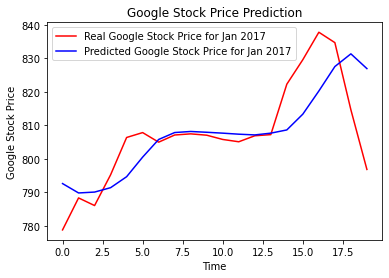

In [21]:
#viewing results

plt.plot(real_stock_price,color='red', label='Real Google Stock Price for Jan 2017')
plt.plot(predicted_stock_price,color='blue', label='Predicted Google Stock Price for Jan 2017')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()